In [66]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

In [67]:
# reading the data

In [68]:
student_data = pd.read_csv("student-mat.csv", sep=';')
student_data.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,14,15,15


In [69]:
# dropping G1 and G2

In [70]:
student_data.drop(['G1', 'G2'], axis=1, inplace=True)
student_data.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,10
5,GP,M,16,U,LE3,T,4,3,services,other,...,yes,no,5,4,2,1,2,5,10,15
6,GP,M,16,U,LE3,T,2,2,other,other,...,yes,no,4,4,4,1,1,3,0,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,no,no,4,1,4,1,1,1,6,6
8,GP,M,15,U,LE3,A,3,2,services,other,...,yes,no,4,2,2,1,1,1,0,19
9,GP,M,15,U,GT3,T,3,4,other,other,...,yes,no,5,5,1,1,1,5,0,15


In [71]:
# adding a COLUMN with the information regarding PASS and FAIL (the grade < 10)

In [72]:
student_data['pass']=0
student_data.loc[student_data['G3'] >= 10, 'pass'] = 1 ## it updates the column "pass"
student_data.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3,pass
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,4,3,4,1,1,3,6,6,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,no,5,3,3,1,1,3,4,6,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,no,4,3,2,2,3,3,10,10,1
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,3,2,2,1,1,5,2,15,1
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,4,3,2,1,2,5,4,10,1
5,GP,M,16,U,LE3,T,4,3,services,other,...,no,5,4,2,1,2,5,10,15,1
6,GP,M,16,U,LE3,T,2,2,other,other,...,no,4,4,4,1,1,3,0,11,1
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,no,4,1,4,1,1,1,6,6,0
8,GP,M,15,U,LE3,A,3,2,services,other,...,no,4,2,2,1,1,1,0,19,1
9,GP,M,15,U,GT3,T,3,4,other,other,...,no,5,5,1,1,1,5,0,15,1


In [73]:
train_df['G3'].describe()

count    316.000000
mean      10.427215
std        4.490316
min        0.000000
25%        8.000000
50%       11.000000
75%       13.250000
max       20.000000
Name: G3, dtype: float64

In [74]:
train_df['pass'].describe()

count    316.000000
mean       0.667722
std        0.471777
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: pass, dtype: float64

In [75]:
# defining the TRAIN and TEST datasets

In [76]:
train_df, test_df = train_test_split(student_data, test_size=0.20, random_state=14)

print(train_df.shape)
print(test_df.shape)

(316, 32)
(79, 32)


In [77]:
train_df.head(2)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3,pass
283,GP,F,18,U,GT3,T,1,1,other,other,...,no,5,4,4,1,1,4,4,10,1
183,GP,F,17,U,LE3,T,3,3,other,other,...,yes,5,3,3,2,3,1,56,8,0


In [78]:
test_df.head(2)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3,pass
264,GP,F,18,U,GT3,T,2,2,at_home,services,...,yes,4,3,3,1,1,3,0,0,0
49,GP,F,15,U,GT3,T,4,4,services,teacher,...,no,4,4,4,1,1,3,2,7,0


In [79]:
# saving the TRAINING and TESTING DATA in separate files

In [80]:
train_df.to_csv('student-mat-train.csv', index=False)
test_df.to_csv('student-mat-test.csv', index=False)

In [81]:
# Exploring the OUTPUT that is G3

<AxesSubplot:>

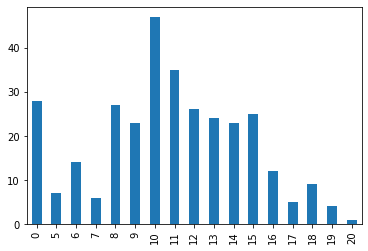

In [82]:
grade_counts = train_df['G3'].value_counts().sort_index()
grade_counts.plot(kind='bar') 

In [83]:
# Filling in the MISSING VALUES
grade_counts = train_df['G3'].value_counts()
print(grade_counts)

for g in range(0,21): 
    if g not in grade_counts.index: # ie when g is 1,2,3,4
        grade_counts.loc[g] = 0

10    47
11    35
0     28
8     27
12    26
15    25
13    24
14    23
9     23
6     14
16    12
18     9
5      7
7      6
17     5
19     4
20     1
Name: G3, dtype: int64


0     28
1      0
2      0
3      0
4      0
5      7
6     14
7      6
8     27
9     23
10    47
11    35
12    26
13    24
14    23
15    25
16    12
17     5
18     9
19     4
20     1
Name: G3, dtype: int64


<AxesSubplot:>

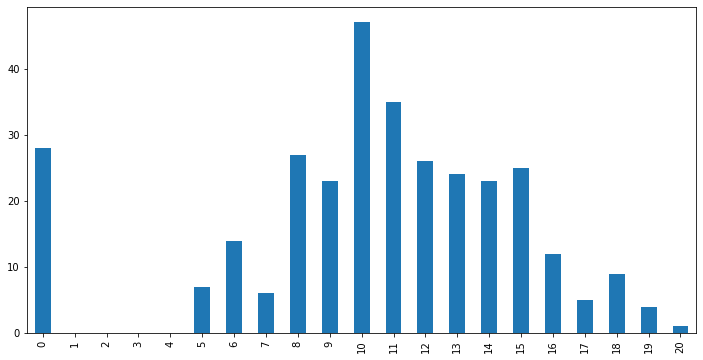

In [84]:
grade_counts.sort_index(inplace=True)
print(grade_counts)

fig, ax = plt.subplots(1, 1, figsize=(12, 6))
grade_counts.plot(kind='bar', ax=ax) 

In [85]:
# Exploring the DISTRIBUTION of PASS/FAIL

<AxesSubplot:>

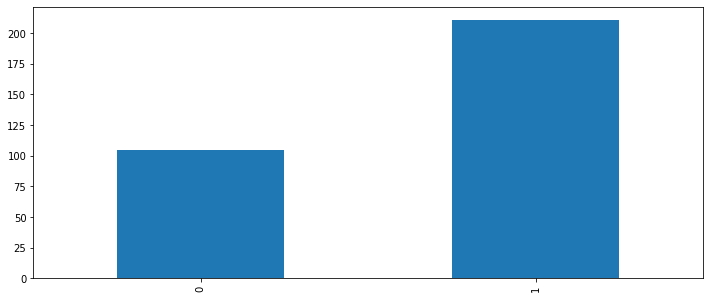

In [87]:
fig, ax1 = plt.subplots(1, 1, figsize=(12, 5))
train_df['pass'].value_counts().sort_index().plot(kind='bar', ax=ax1)

In [88]:
# Visualizing the distribution of the FEATURES

In [89]:
# the feature "SCHOOL"

Text(0.5, 1.0, 'school')

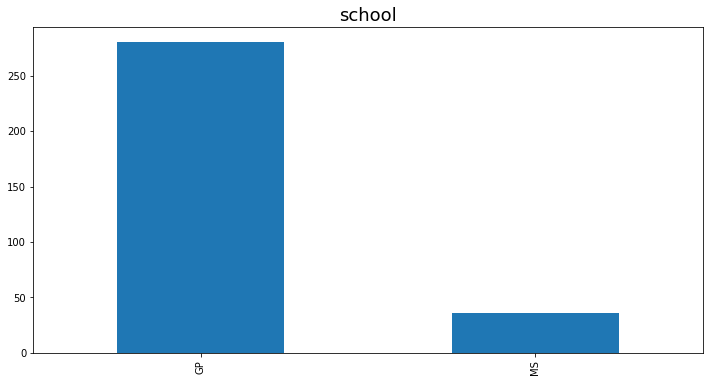

In [90]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
train_df['school'].value_counts().sort_index().plot(ax=ax, kind="bar")
ax.set_title("school", fontsize=18)

In [91]:
# the feature "SEX"

Text(0.5, 1.0, 'sex')

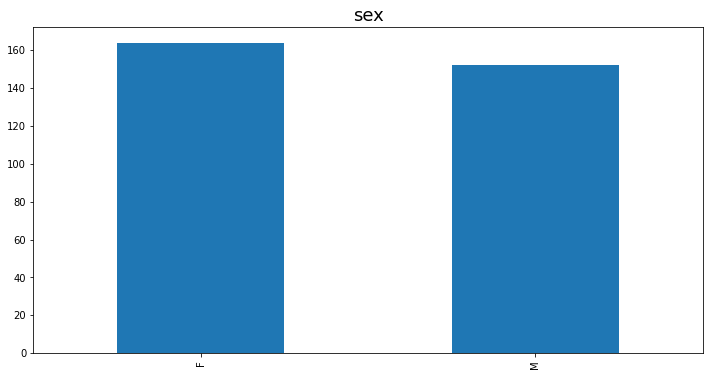

In [92]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
train_df['sex'].value_counts().sort_index().plot(ax=ax, kind="bar")
ax.set_title("sex", fontsize=18)

In [93]:
# the feature "AGE"

Text(0.5, 1.0, 'age')

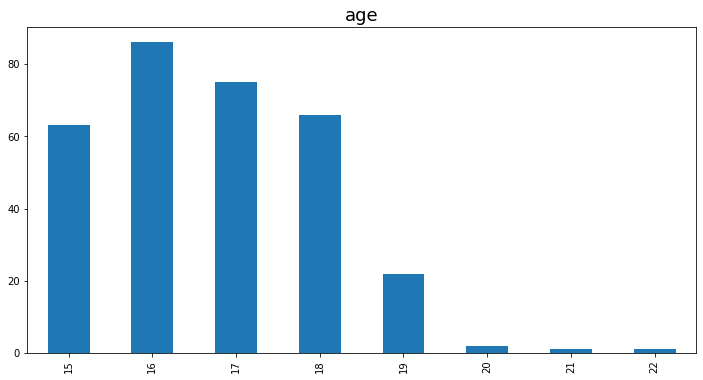

In [94]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
train_df['age'].value_counts().sort_index().plot(ax=ax, kind="bar")
ax.set_title("age", fontsize=18)

In [95]:
# the feature "FAMSIZE"

Text(0.5, 1.0, 'famsize')

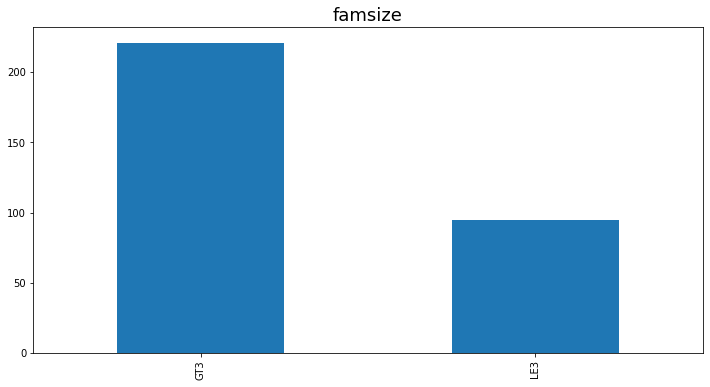

In [96]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
train_df['famsize'].value_counts().sort_index().plot(ax=ax, kind="bar")
ax.set_title("famsize", fontsize=18)

In [97]:
# the feature "FREETIME"

Text(0.5, 1.0, 'freetime')

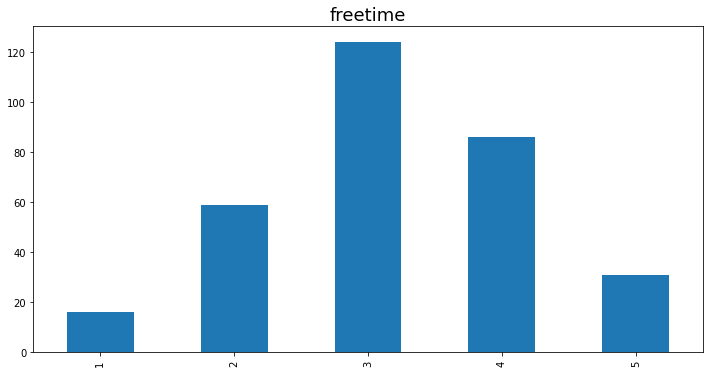

In [98]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
train_df['freetime'].value_counts().sort_index().plot(ax=ax, kind="bar")
ax.set_title("freetime", fontsize=18)

In [99]:
# the feature "HEALTH"

Text(0.5, 1.0, 'health')

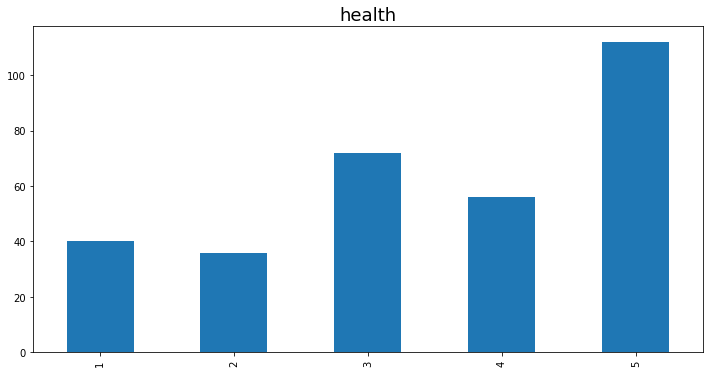

In [100]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
train_df['health'].value_counts().sort_index().plot(ax=ax, kind="bar")
ax.set_title("health", fontsize=18)

In [101]:
# the feature "ABSENCES"

Text(0.5, 1.0, 'absences')

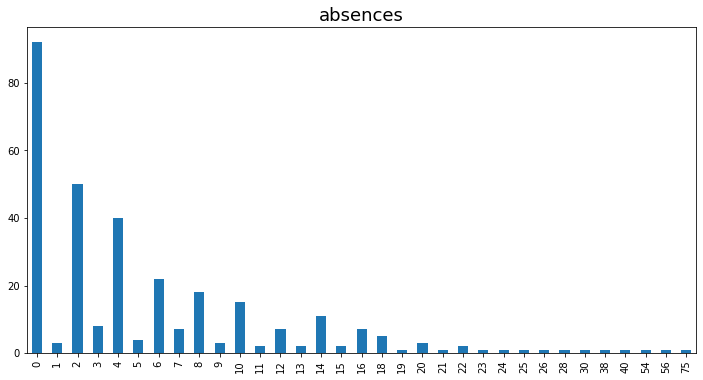

In [102]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
train_df['absences'].value_counts().sort_index().plot(ax=ax, kind="bar")
ax.set_title("absences", fontsize=18)